<a href="https://colab.research.google.com/github/ShawnTayNWU/MSDS460/blob/Assignments/MSDS_460_Ass_2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Question 2

Carco manufactures cars and trucks.  Each car contributes 300 to profit and each truck, 400; these profits do not consider machine rental.  The resources required to manufacture a car and a truck are shown below.  Each day Carco can rent up to 98 Type 1 machines at a cost of 50 per machine.  The company now has 73 Type 2 machines and 260 tons of steel available.  Marketing considerations dictate that at least 88 cars and at least 26 trucks be produced.

Part A:  Formulate the problem as a Linear Program.
Part B:  Solve the LP (provide exact values for all variables and the optimal objective function).
Hint:  The optimal objective function value is 32540
[Note, I am providing this hint because having the optimal solution is necessary to do Part C.]

Part C:  Answer the following questions from your output.  (Note, do not simply rerun the model – use the Linear Programming output and Sensitivity Analysis to explain your answers.)

i)  If cars contributed 310 to profit, what would be the new optimal solution to the problem?

ii) What is the most that Carco should be willing to pay to rent an additional Type 1 machine for 1 day?

iii) What is the most that Carco should be willing to pay for an extra ton of steel?

iv) If Carco were required to produce at least 86 cars, what would Carco’s profit become?

v) Carco is considering producing jeeps.  A jeep contributes 600 to profit and requires 1.2 days on machine 1, 2 days on machine 2, and 4 tons of steel.  Should Carco produce any jeeps?

Table:

Vehicle Type		Days on Machine 1		Days on Machine 2		Tons of Steel

Car			0.8				0.6				2

Truck			1				0.7				3





## 1. Import Packages

#### Only for Google Colab: Need to install non standard package each time

In [1]:
!pip install pulp #Run this only the first time, no need to install each time

     |████████████████████████████████| 14.2 MB 4.3 MB/s 


#### Import Libraries

In [2]:
# import the library pulp as p
import pulp as p
import pandas as pd

# import pulp
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize, GLPK
# Note, you may need to conda install or pip install GLPK

# Sensitivity Analysis File and Model (lp) file will output
# to your working directory.


## 2. Define variables, problem, objective function and constraints







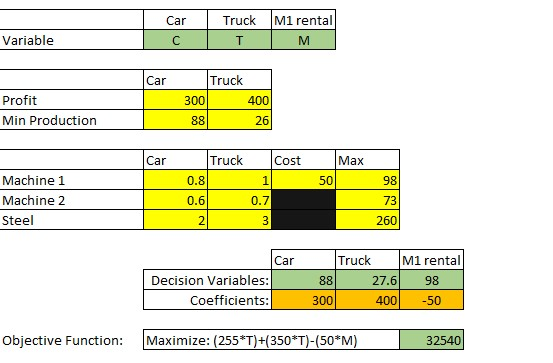

In [10]:
 # Create a LP Maximization problem
Lp_prob = p.LpProblem('Problem', p.LpMaximize) 
  
# Create problem Variables 
C = p.LpVariable("C", lowBound = 0, cat='Continuous')  # Cars built
T = p.LpVariable("T", lowBound = 0, cat='Continuous')  # Trucks Built
M = p.LpVariable("M", lowBound = 0, cat='Continuous')  # Machine 1 rental

  
# Objective Function
Lp_prob += (255*T)+(350*T)-(50*M)

# Constraints:
Lp_prob += ((0.8*C)+(1*T))-M<=0     # Machine 1 consumption                                                     
Lp_prob += (0.6*C)+(0.7*T)<=73      # max 73hr Machine 2
Lp_prob += M<=98                    # max 98hr Machine 1
Lp_prob += (2*C)+(3*T)<=260         # max 260 Steel
Lp_prob += C>=88                    # Minimum 88 cars
Lp_prob += T>=26                    # Minimum 26 Trucks

  
# Display the problem
print(Lp_prob)

Problem:
MAXIMIZE
-50*M + 605*T + 0
SUBJECT TO
_C1: 0.8 C - M + T <= 0

_C2: 0.6 C + 0.7 T <= 73

_C3: M <= 98

_C4: 2 C + 3 T <= 260

_C5: C >= 88

_C6: T >= 26

VARIABLES
C Continuous
M Continuous
T Continuous



## 3. Solve Problem and print outputs

In [11]:
# Solve the problem
status = Lp_prob.solve()
print(f"Assignment 2 Q2")
print(f"status={p.LpStatus[status]}")

# Print the results
for variable in Lp_prob.variables():
    print(f"{variable.name} = {variable.varValue}")
    
print(f"Objective = {p.value(Lp_prob.objective)}")
print(f"")

Assignment 2 Q2
status=Optimal
C = 88.0
M = 98.0
T = 27.6
Objective = 11798.0



In [5]:
SenAnalysis = [{'name': name, 'Shadow Price': c.pi, 'Slack':c.slack} for name, c in Lp_prob.constraints.items()]
print (pd.DataFrame(SenAnalysis))

  name  Shadow Price  Slack
0  _C1         605.0  -0.00
1  _C2          -0.0   0.88
2  _C3          -0.0   1.20
3  _C4        -484.0  -0.00
4  _C5          -0.0  -1.60


#### Do not run this in Colab, only run in Jupyter Notebook.

In [ ]:
# Output Results and Sensitivity
Lp_prob.writeLP("Ass2Q3.lp")
Lp_prob.solve(GLPK(options=['--ranges Ass2Q3.sen']))
print ("Status:", LpStatus[Lp_prob.status])

for v in Lp_prob.variables():
    print(v.name, "=", v.varValue)

print ("Objective", value(Lp_prob.objective))
print ("")